In [4]:
import numpy as np
import helper_functions as functions
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from collections import Counter

### working on words in each trial

In [22]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [23]:
len(data_json_list)

17335

In [24]:
all_words = []

for r in data_json_list:
    all_words += r["actualWords_studyPhase"]

In [25]:
len(all_words)

277360

In [26]:
ct = Counter(all_words)

In [27]:
x=ct.most_common()[:10]
x

[('MARINE', 349),
 ('OTTER', 348),
 ('BEAVER', 342),
 ('DIVER', 340),
 ('ANIMAL', 339),
 ('CRAB', 335),
 ('CREATURE', 325),
 ('FISH', 320),
 ('SWIMMER', 318),
 ('SEAL', 317)]

In [32]:
x=pd.DataFrame(x)
x.columns = ["word","occurrence in trials"]
x

,word,occurrence in trials
0,MARINE,349
1,OTTER,348
2,BEAVER,342
3,DIVER,340
4,ANIMAL,339
5,CRAB,335
6,CREATURE,325
7,FISH,320
8,SWIMMER,318
9,SEAL,317


In [33]:
x=ct.most_common()[-10:]
x

[('GHETTO', 44),
 ('CEMETERY', 43),
 ('WEB', 43),
 ('MUMMY', 40),
 ('HUSBAND', 39),
 ('SPOUSE', 39),
 ('GYM', 38),
 ('GHOST', 30),
 ('PIMPLE', 28),
 ('SUNSET', 26)]

In [34]:
x=pd.DataFrame(x)
x.columns = ["word","occurrence in trials"]
x

,word,occurrence in trials
0,GHETTO,44
1,CEMETERY,43
2,WEB,43
3,MUMMY,40
4,HUSBAND,39
5,SPOUSE,39
6,GYM,38
7,GHOST,30
8,PIMPLE,28
9,SUNSET,26


In [35]:
unique_words = list(set(all_words))
len(unique_words)

1638

In [36]:
unique_words_length = [len(i) for i in unique_words]

In [58]:
ctl = Counter(unique_words_length)

In [59]:
x=ctl.most_common()
x

[(5, 330),
 (6, 323),
 (4, 307),
 (7, 244),
 (8, 158),
 (3, 115),
 (9, 97),
 (10, 44),
 (11, 14),
 (12, 5),
 (2, 1)]

In [60]:
x=pd.DataFrame(x)
x.columns = ["length of word","occurrence in vocabulary"]
x = x.sort_values(by="length of word")
x.reset_index(inplace=True,drop=True)
x.loc[len(x.index)] = ["TOTAL",x["occurrence in vocabulary"].sum()] 
x

,length of word,occurrence in vocabulary
0,2,1
1,3,115
2,4,307
3,5,330
4,6,323
5,7,244
6,8,158
7,9,97
8,10,44
9,11,14


In [64]:
[i for i in unique_words if len(i)==12]

['RECEPTIONIST',
 'ENCYCLOPEDIA',
 'HANDKERCHIEF',
 'PROFESSIONAL',
 'REFRIGERATOR']

### testing word length hypothesis

In [73]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [74]:
len(data_json_list)

17335

In [76]:
word_length_total = [0]*12
word_length_recalled = [0]*12

for r in data_json_list:
    a = r["actualWords_studyPhase"]
    b = r["actualWords_recallPhase"]
    for i in a:
        word_length_total[len(i)-1]+=1
        if i in b:
            word_length_recalled[len(i)-1]+=1


In [78]:
word_length_total , word_length_recalled

([0, 305, 19811, 53565, 54973, 54801, 40393, 26096, 17075, 6831, 2582, 928],
 [0, 232, 12486, 31955, 33296, 33381, 24871, 16267, 11044, 4413, 1823, 647])

In [80]:
word_length = [i for i in range(2,13)]
recall_rate = [i/j for i,j in zip(word_length_recalled[1:],word_length_total[1:])]
recall_rate

[0.760655737704918,
 0.6302559184291555,
 0.5965649211238682,
 0.6056791515835046,
 0.6091312202332074,
 0.615725496992053,
 0.6233522378908645,
 0.6467935578330893,
 0.6460254721124287,
 0.7060418280402788,
 0.697198275862069]

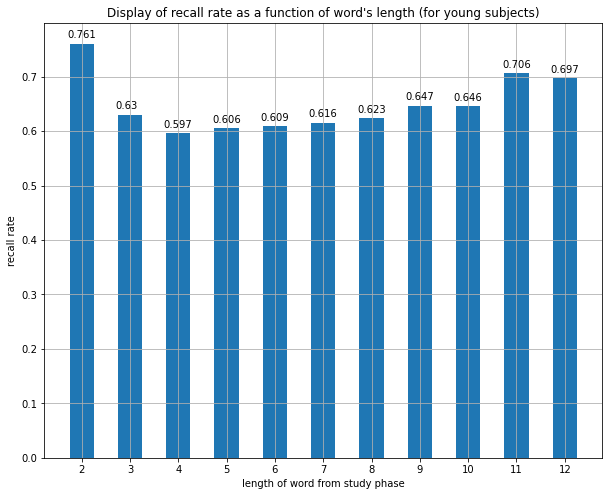

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(word_length, 
        recall_rate,
        width = 0.5)
plt.xticks(word_length)
plt.title("Display of recall rate as a function of word's length (for young subjects)")
plt.xlabel("length of word from study phase")
plt.ylabel("recall rate")

for index in range(len(word_length)):
    ax.text(word_length[index]-0.3, recall_rate[index]+0.01, round(recall_rate[index],3), size=10)

plt.grid()
plt.show() 